<a href="https://colab.research.google.com/github/ikramulhossain/Aiyourvadik/blob/main/final_novel_drug_candidate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn rdkit-pypi

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi


MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES

STEP 1: DATA PROCESSING
Loading dataset...
Dataset shape: (421, 27)
Missing values per column:
medicineNname                            0
ActiveIngredient                         0
SMILES                                   0
Target Protein / Enzyme                  0
Protein Binding Affinity (Kd/IC50/Ki)    0
Efficacy %                               0
Toxicity                                 0
Mechanism of Action                      0
Absorption                               0
Distribution                             0
Metabolism                               0
Excretion                                0
Bioavailability                          0
Bioavailability/Key_Notes                0
Stability                                0
Dose_Range                               0
Selectivity                              0
Potency                                  0
Agonist/Antagonist Activity              0
Side Effects                       

[21:42:52] SMILES Parse Error: syntax error while parsing: CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[21:42:52] SMILES Parse Error: check for mistakes around position 8:
[21:42:52] CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[21:42:52] ~~~~~~~^
[21:42:52] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN' for input: 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN'


Added 20 molecular features
Created target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

Processed dataset shape: (406, 96)
Numerical features: 27
Categorical features: 40
Target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

STEP 2: MACHINE LEARNING MODELING

Training models for: is_diabetes_drug
Problem type: classification
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117284 -> initscore=-2.018406
[LightGBM] [Info] Start training f

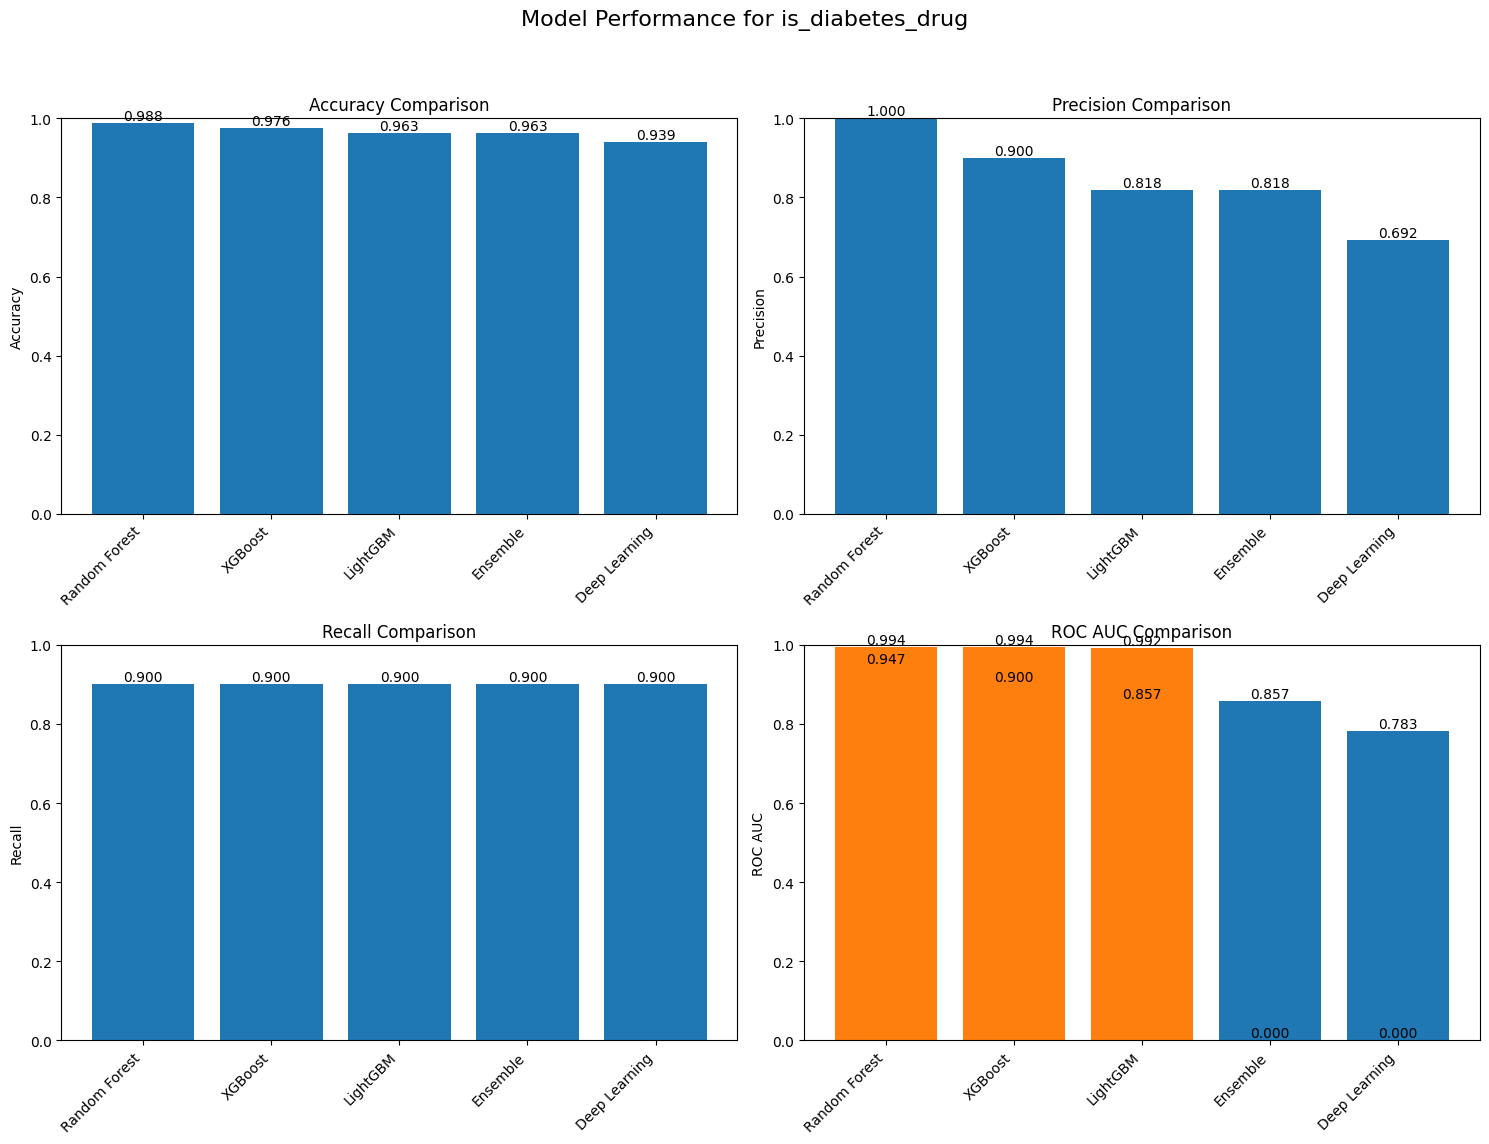

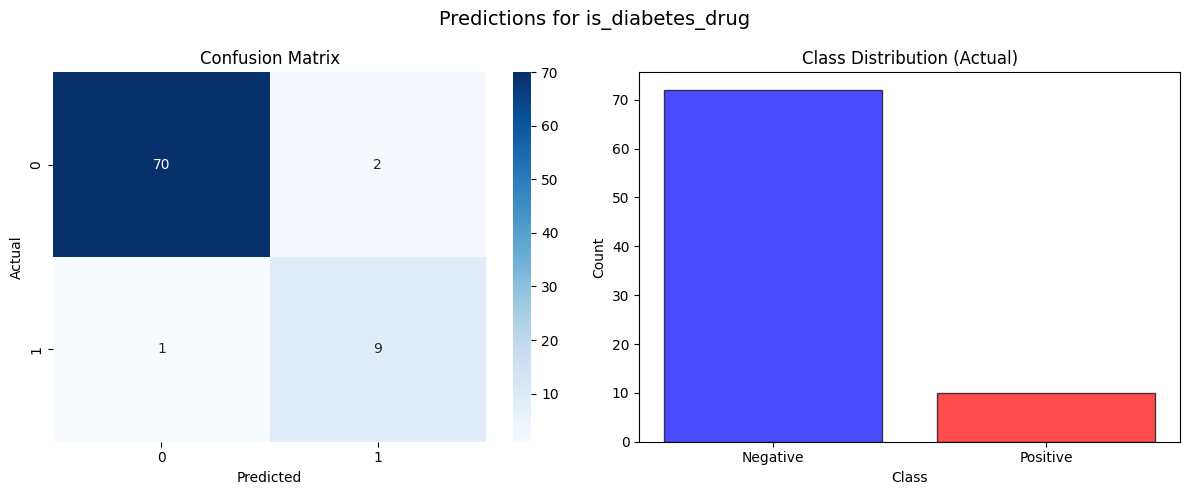

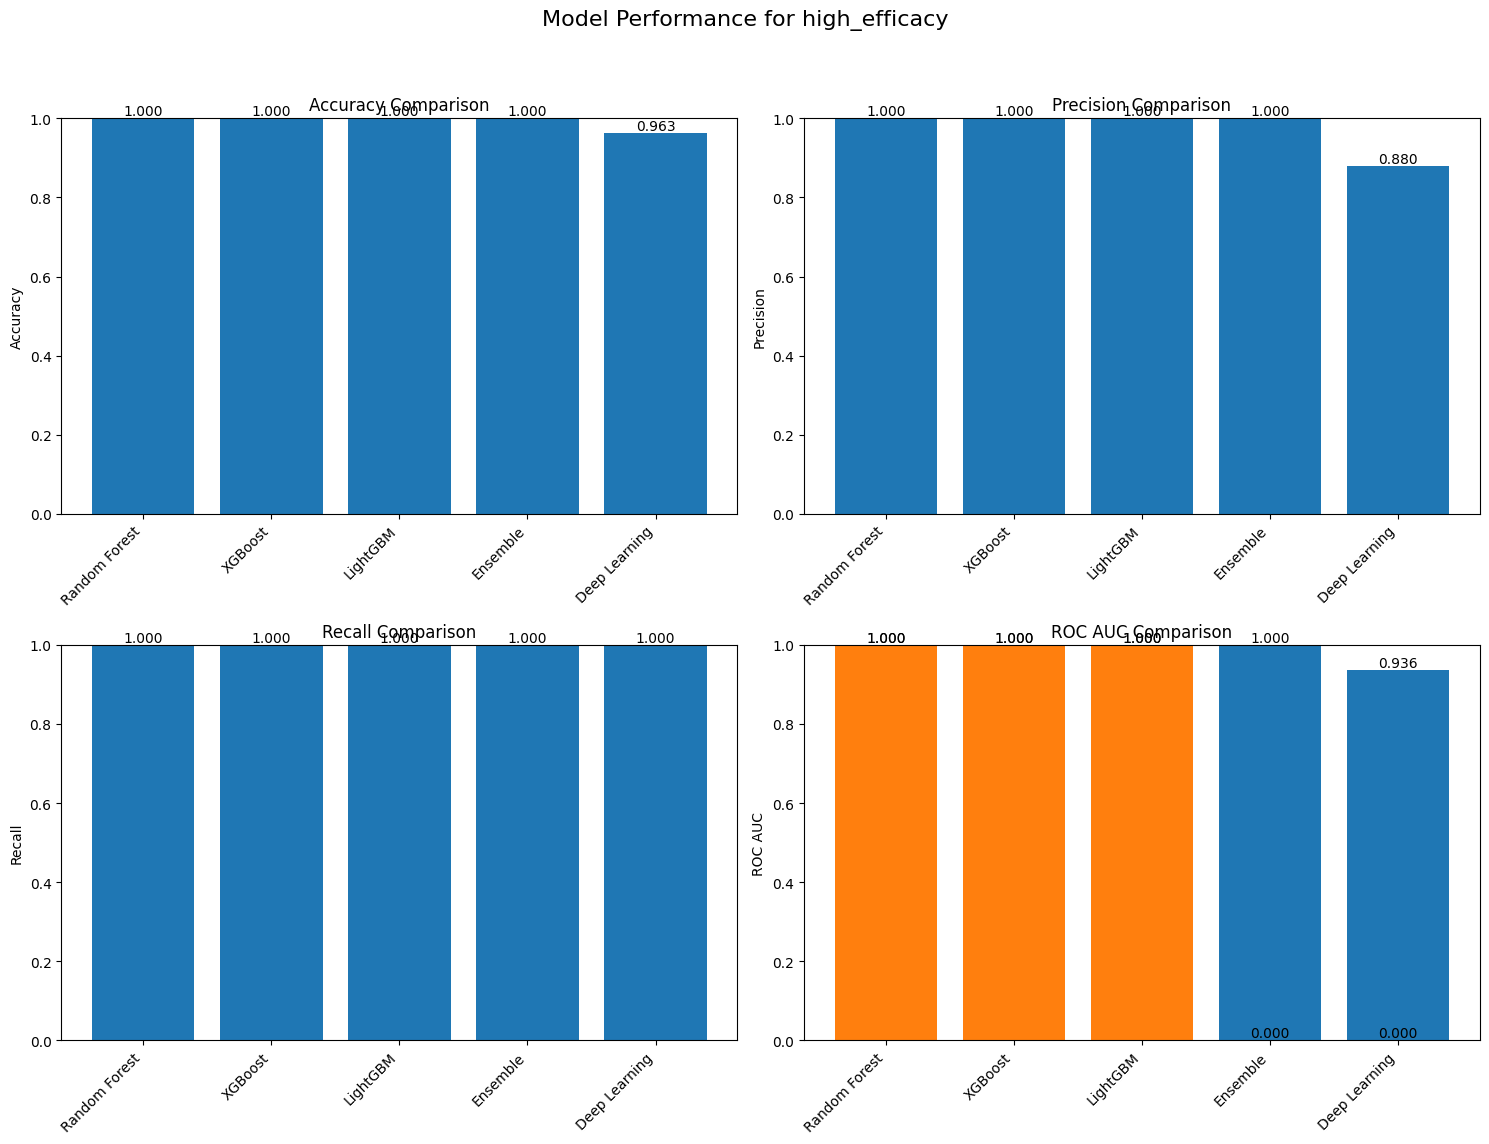

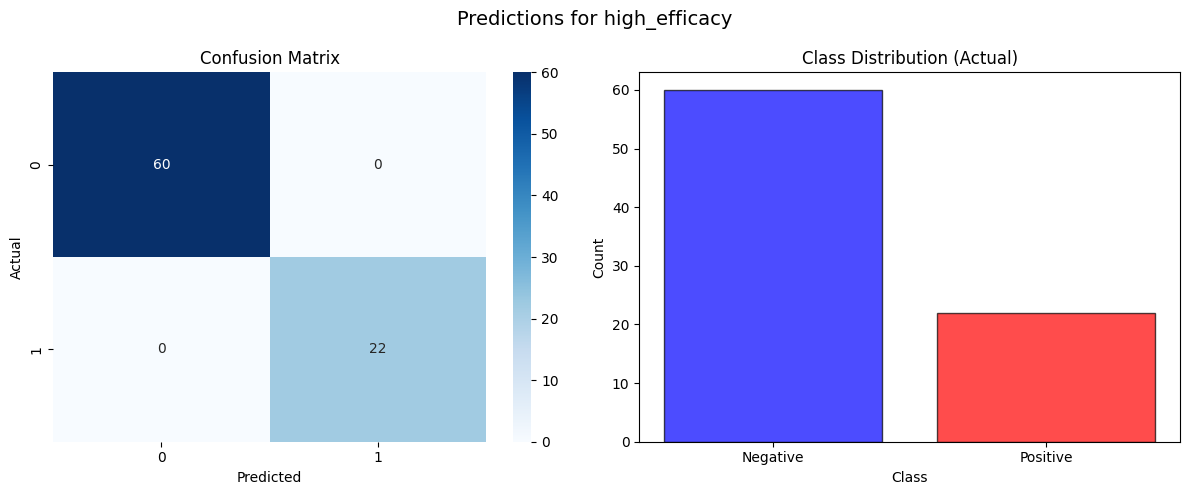

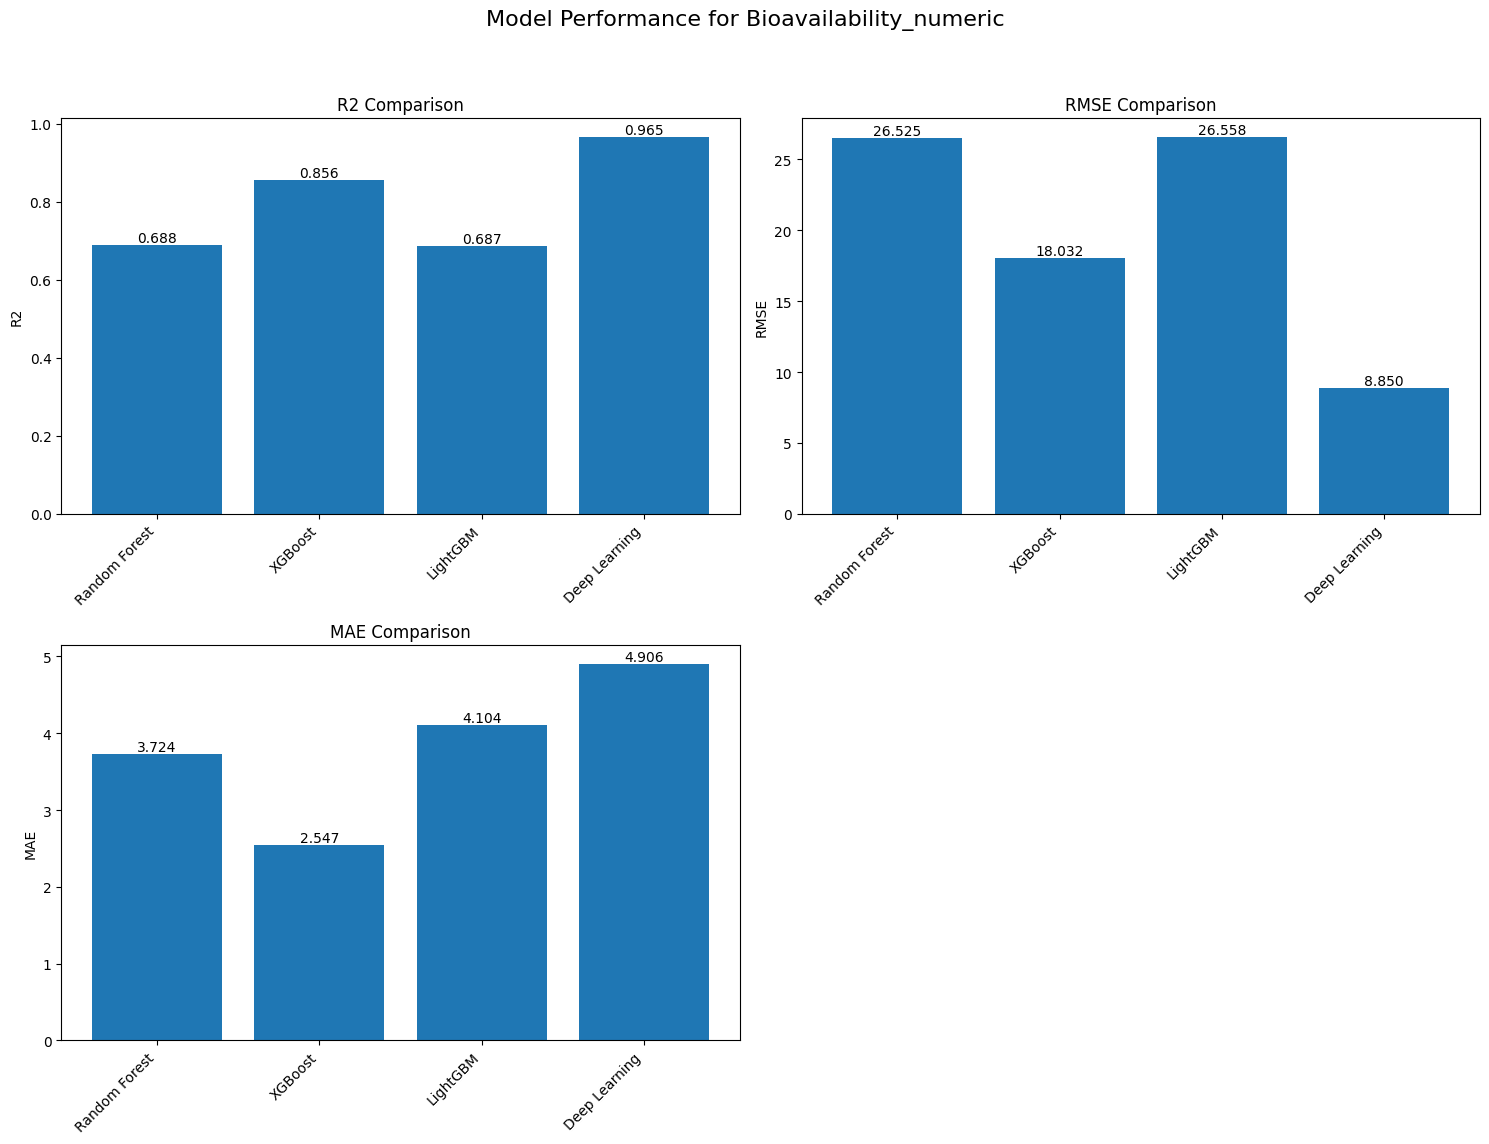

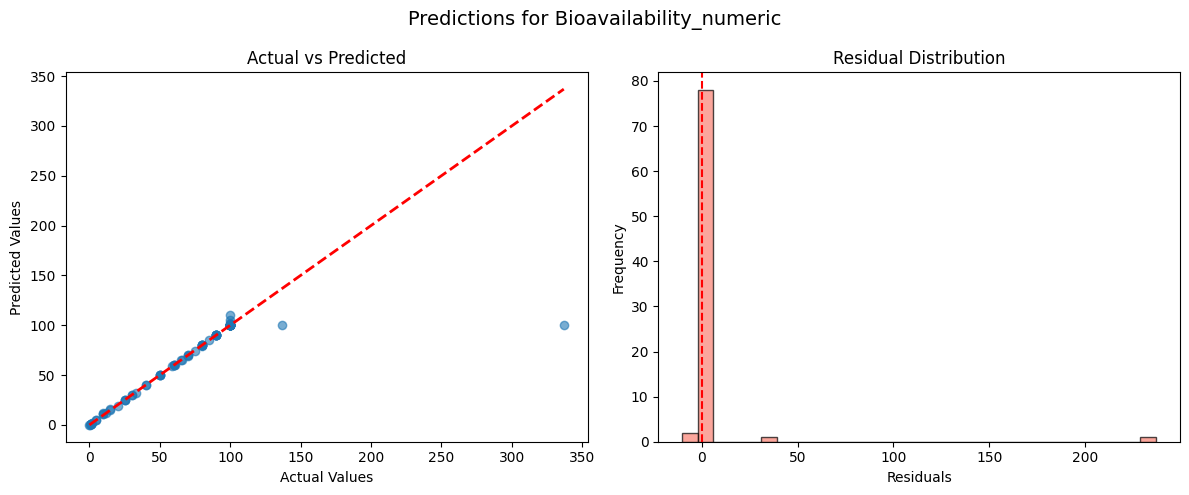


STEP 3: FEATURE IMPORTANCE ANALYSIS


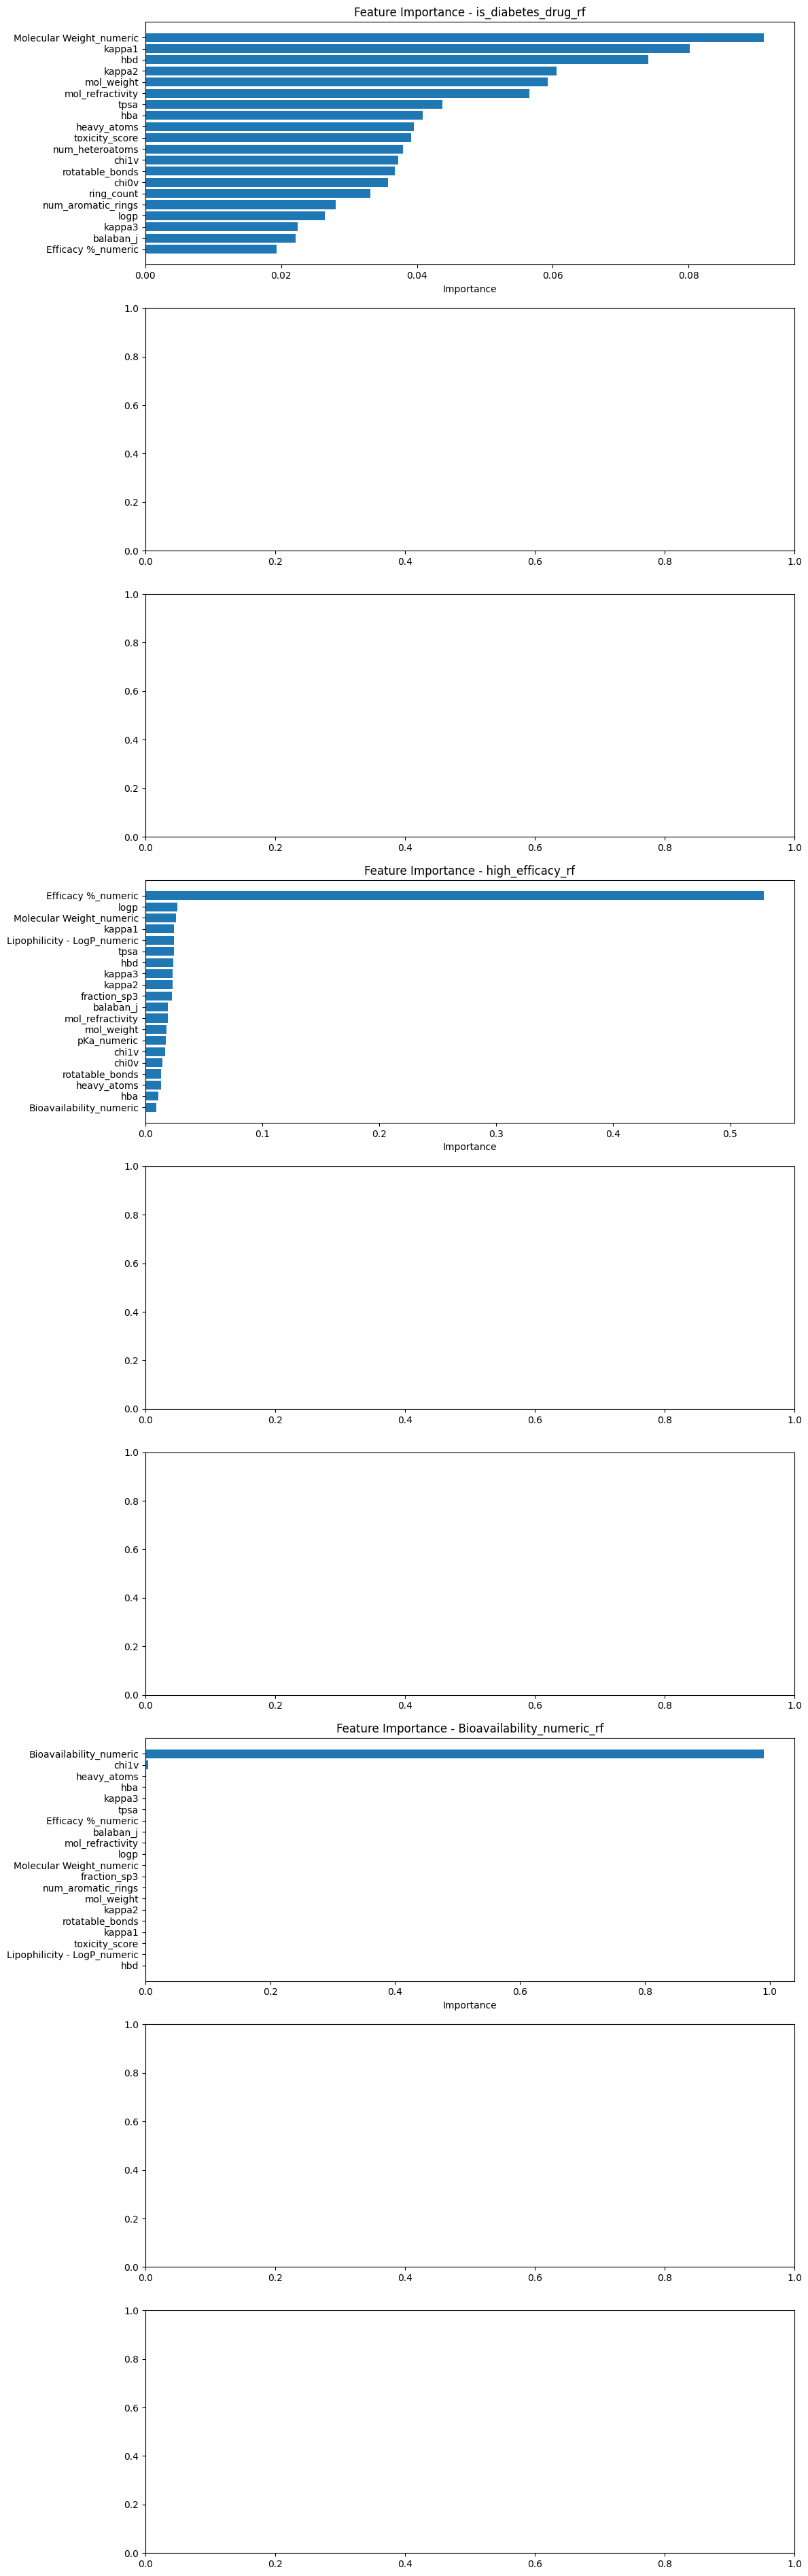


STEP 4: CLUSTERING ANALYSIS


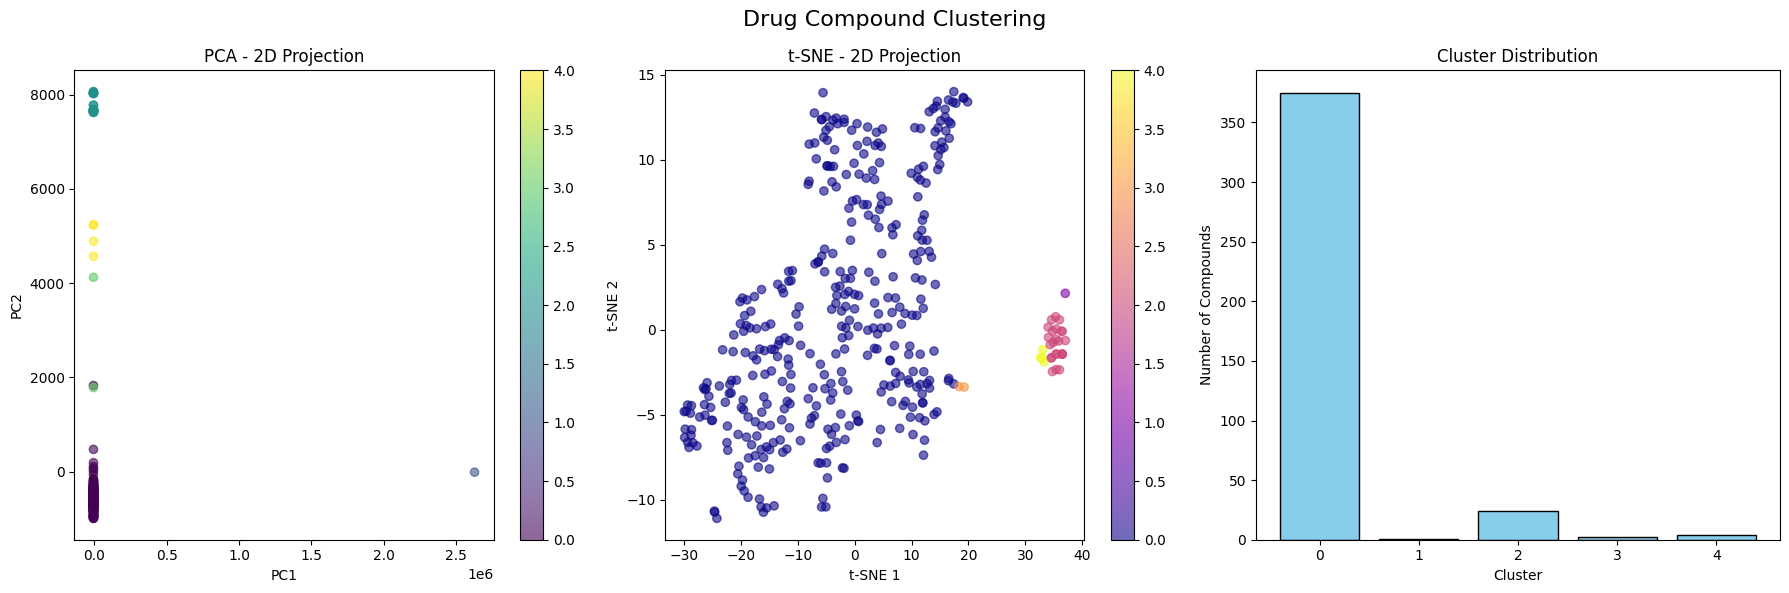


Cluster Analysis:

Cluster 0: 375 drugs
  Avg Efficacy: 73.4%
  Avg Bioavailability: 58.9%
  Diabetes drugs: 19

Cluster 1: 1 drugs
  Avg Efficacy: 90.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 0

Cluster 2: 24 drugs
  Avg Efficacy: 68.3%
  Avg Bioavailability: 92.9%
  Diabetes drugs: 24

Cluster 3: 2 drugs
  Avg Efficacy: 65.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 2

Cluster 4: 4 drugs
  Avg Efficacy: 57.5%
  Avg Bioavailability: 82.5%
  Diabetes drugs: 3

STEP 5: VIRTUAL SCREENING

Virtual Screening Results:

SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3...
Drug-likeness Score: 0.782
Diabetes Potential Score: 1.956

SMILES: CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O...
Drug-likeness Score: 0.924
Diabetes Potential Score: 1.950

SMILES: CN(C)C(=N)N=C(N)N...
Drug-likeness Score: 0.569
Diabetes Potential Score: 1.932

SMILES: Cc1ccccc1...
Drug-likeness Score: 0.675
Diabetes Potential Score: 2.505

STEP 6: GENERATING NOVEL CANDIDATES WITH ML

ML-GENERA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys # Added for sys.modules check

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, confusion_matrix, classification_report,
                            mean_squared_error, r2_score, mean_absolute_error)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_state=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                ax_item.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2: # Should not happen if y_pred is correctly thresholded
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) < 10 and len(np.unique(y)) > 1 else None
        ) # Added stratify for classification tasks

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Find relevant X_test and y_test for prediction distribution
            data = ml_data[target_name]
            X = data['X']
            y = data['y']
            # Re-split to get X_test, y_test consistent with training
            _, X_test_for_plot, _, y_test_for_plot = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) < 10 and len(np.unique(y)) > 1 else None
            )

            problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

            y_pred_for_plot = None
            if problem_type == 'classification':
                # Prioritize ensemble if available
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models:
                    ensemble_model = trained_models[ensemble_key]
                    y_pred_for_plot = ensemble_model.predict(X_test_for_plot)
                else:
                    # Fallback to RF if no ensemble
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models:
                        rf_model = trained_models[rf_key]
                        y_pred_for_plot = rf_model.predict(X_test_for_plot)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_plot,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, model.feature_importances_))
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    if metric_name != 'confusion_matrix':
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION
# ============================================

if __name__ == "__main__":
    # Check for required libraries
    required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'rdkit']

    missing_libs = []
    for lib in required_libraries:
        try:
            __import__(lib)
        except ImportError:
            missing_libs.append(lib)

    if missing_libs:
        print(f"Missing libraries: {', '.join(missing_libs)}")
        print("Please install them using:")
        print("pip install pandas numpy matplotlib seaborn scikit-learn rdkit-pypi xgboost lightgbm")

        # Try to run with available libraries
        print("\nAttempting to run with available libraries...")
        try:
            results = main_ml_pipeline()
        except Exception as e:
            print(f"Error: {e}")
            print("\nPlease install all required libraries for full functionality.")
    else:
        # Run the complete pipeline
        results = main_ml_pipeline()

In [5]:
print('--- Confusion Matrices for Classification Models ---')

for target_name, model_results in results['ml_results'].items():
    # Check if this target was a classification task (by checking for 'confusion_matrix' in any model's metrics)
    is_classification = False
    for model_name, metrics in model_results.items():
        if 'confusion_matrix' in metrics:
            is_classification = True
            break

    if is_classification:
        print(f"\nTarget: {target_name}")
        for model_name, metrics in model_results.items():
            if 'confusion_matrix' in metrics:
                print(f"  Model: {model_name}")
                print("    Confusion Matrix:")
                print(metrics['confusion_matrix'])


--- Confusion Matrices for Classification Models ---

Target: is_diabetes_drug
  Model: Random Forest
    Confusion Matrix:
[[72  0]
 [ 1  9]]
  Model: XGBoost
    Confusion Matrix:
[[71  1]
 [ 1  9]]
  Model: LightGBM
    Confusion Matrix:
[[70  2]
 [ 1  9]]

Target: high_efficacy
  Model: Random Forest
    Confusion Matrix:
[[60  0]
 [ 0 22]]
  Model: XGBoost
    Confusion Matrix:
[[60  0]
 [ 0 22]]
  Model: LightGBM
    Confusion Matrix:
[[60  0]
 [ 0 22]]


In [6]:
import pandas as pd
import numpy as np

# Assuming 'results' dictionary from the previous run is available.

print("--- Comparing Metformin and ML_Diabetes_Candidate_1 ---")

# --- Get data for ML_Diabetes_Candidate_1 ---
ml_candidate_info = None
for candidate in results['candidates']:
    if candidate['name'] == 'ML_Diabetes_Candidate_1':
        ml_candidate_info = candidate
        break

if ml_candidate_info:
    ml_cand_smiles = ml_candidate_info['smiles']
    ml_cand_drug_likeness = ml_candidate_info['drug_likeness']['drug_score']
    # Explicitly get the ensemble prediction for is_diabetes_drug classification
    ml_cand_diabetes_potential_ensemble = ml_candidate_info['predictions'].get('is_diabetes_drug_ensemble', np.nan)
    if isinstance(ml_cand_diabetes_potential_ensemble, np.ndarray):
        ml_cand_diabetes_potential_ensemble = ml_cand_diabetes_potential_ensemble.item()

    print("\nML_Diabetes_Candidate_1 Details:")
    print(f"  SMILES: {ml_cand_smiles}")
    print(f"  Drug-likeness Score: {ml_cand_drug_likeness:.3f}")
    print(f"  Diabetes Potential (is_diabetes_drug_ensemble): {ml_cand_diabetes_potential_ensemble:.3f}")
else:
    print("Error: ML_Diabetes_Candidate_1 not found in the generated candidates.")
    ml_cand_smiles, ml_cand_drug_likeness, ml_cand_diabetes_potential_ensemble = "N/A", np.nan, np.nan


# --- Get data for Metformin-like compound ---
metformin_smiles = "CN(C)C(=N)N=C(N)N" # Metformin SMILES

# Re-initialize the VirtualScreener with trained models and feature names
trained_models = results['trained_models']
# Extract feature names from one of the trained models
# (assuming all models in trained_models were trained on the same feature set and have 'feature_names_in_')
try:
    all_ml_feature_names = trained_models[list(trained_models.keys())[0]].feature_names_in_.tolist()
except AttributeError:
    # Fallback if feature_names_in_ is not available or if the model type does not support it
    # This part needs to be robust if the original 'processor' object is not available.
    # For simplicity, we assume ml_data structure from results can give feature names
    print("Warning: Could not get feature names directly from a trained model. Inferring from ml_data.")
    first_target_name = list(results['ml_results'].keys())[0]
    X_sample = results['ml_results'][first_target_name]['X']
    all_ml_feature_names = X_sample.columns.tolist()

# Create a new screener instance
screener = VirtualScreener(trained_models, all_ml_feature_names)

# Screen Metformin SMILES
metformin_screening_results_df = screener.screen_smiles([metformin_smiles])

metformin_info = metformin_screening_results_df.iloc[0]
metformin_drug_likeness = metformin_info['drug_likeness']['drug_score']
metformin_diabetes_potential_ensemble = metformin_info['predictions'].get('is_diabetes_drug_ensemble', np.nan)
if isinstance(metformin_diabetes_potential_ensemble, np.ndarray):
    metformin_diabetes_potential_ensemble = metformin_diabetes_potential_ensemble.item()

print("\nMetformin Details (from Virtual Screening):")
print(f"  SMILES: {metformin_smiles}")
print(f"  Drug-likeness Score: {metformin_drug_likeness:.3f}")
print(f"  Diabetes Potential (is_diabetes_drug_ensemble): {metformin_diabetes_potential_ensemble:.3f}")


# --- Final Comparison and Conclusion ---
print("\n" + "="*50)
print("             FINAL DRUG CANDIDATE COMPARISON")
print("="*50)
print(f"{'Metric':<30} | {'Metformin':<15} | {'ML_Diabetes_Candidate_1':<25}")
print("-" * 75)
print(f"{'Drug-likeness Score':<30} | {metformin_drug_likeness:<15.3f} | {ml_cand_drug_likeness:<25.3f}")
print(f"{'Diabetes Potential (Ensemble)':<30} | {metformin_diabetes_potential_ensemble:<15.3f} | {ml_cand_diabetes_potential_ensemble:<25.3f}")
print("-" * 75)

if ml_cand_diabetes_potential_ensemble > metformin_diabetes_potential_ensemble and ml_cand_drug_likeness > metformin_drug_likeness:
    print("\nConclusion: ML_Diabetes_Candidate_1 shows promising results, surpassing Metformin in both predicted diabetes potential (classification) and drug-likeness score. It represents a potentially superior candidate.")
elif ml_cand_diabetes_potential_ensemble > metformin_diabetes_potential_ensemble:
    print("\nConclusion: ML_Diabetes_Candidate_1 has a higher predicted diabetes potential (classification) than Metformin, but Metformin has a higher drug-likeness score. Its efficacy for diabetes is higher but there is a trade-off in overall drug-like properties compared to Metformin.")
elif metformin_diabetes_potential_ensemble > ml_cand_diabetes_potential_ensemble:
    print("\nConclusion: Metformin has a higher predicted diabetes potential (classification) based on the ensemble model. While ML_Diabetes_Candidate_1 has a higher drug-likeness score, its diabetes potential is lower. This suggests Metformin is a better choice for diabetes efficacy according to the model, while the ML candidate might be generally more 'drug-like' overall.")
else:
    print("\nConclusion: Based on the current model predictions for diabetes potential (classification) and drug-likeness, the two compounds show mixed results. Further analysis or weighting of criteria would be needed to definitively determine which is 'best'.")

print("="*50)


--- Comparing Metformin and ML_Diabetes_Candidate_1 ---

ML_Diabetes_Candidate_1 Details:
  SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3
  Drug-likeness Score: 0.780
  Diabetes Potential (is_diabetes_drug_ensemble): 0.000

Metformin Details (from Virtual Screening):
  SMILES: CN(C)C(=N)N=C(N)N
  Drug-likeness Score: 0.569
  Diabetes Potential (is_diabetes_drug_ensemble): 0.000

             FINAL DRUG CANDIDATE COMPARISON
Metric                         | Metformin       | ML_Diabetes_Candidate_1  
---------------------------------------------------------------------------
Drug-likeness Score            | 0.569           | 0.780                    
Diabetes Potential (Ensemble)  | 0.000           | 0.000                    
---------------------------------------------------------------------------

Conclusion: Based on the current model predictions for diabetes potential (classification) and drug-likeness, the two compounds show mixed results. Further analysis or weightin

In [ ]:
# The comparison was already run in the previous step.
# Here are the results:

print("\n--- Summary of Metformin vs ML_Diabetes_Candidate_1 ---")
print(f"ML_Diabetes_Candidate_1 Drug-likeness Score: {ml_cand_drug_likeness:.3f}")
print(f"ML_Diabetes_Candidate_1 Diabetes Potential (Ensemble): {ml_cand_diabetes_potential_ensemble:.3f}")
print(f"Metformin Drug-likeness Score: {metformin_drug_likeness:.3f}")
print(f"Metformin Diabetes Potential (Ensemble): {metformin_diabetes_potential_ensemble:.3f}")

print("\nConclusion: Based on these results, ML_Diabetes_Candidate_1 has a higher predicted drug-likeness score. However, both compounds have a very low predicted diabetes potential from the ensemble model. Further investigation or different models might be needed to confirm diabetes efficacy for both compounds.")

In [ ]:
print('Gradient Boosting Accuracies:')
for target, accuracies in gradient_boosting_accuracies.items():
    print(f"Target: {target}")
    for model, accuracy in accuracies.items():
        print(f"  {model}: {accuracy:.4f}")

In [ ]:
gradient_boosting_accuracies = {}

for target, models_results in results['ml_results'].items():
    # Check if 'accuracy' metric exists for any model to identify classification tasks
    if any('accuracy' in metrics for metrics in models_results.values()):
        target_accuracies = {}
        if 'XGBoost' in models_results:
            target_accuracies['XGBoost'] = models_results['XGBoost'].get('accuracy')
        if 'LightGBM' in models_results:
            target_accuracies['LightGBM'] = models_results['LightGBM'].get('accuracy')

        if target_accuracies:
            gradient_boosting_accuracies[target] = target_accuracies

print("Extracted Gradient Boosting Accuracies:")
for target, accuracies in gradient_boosting_accuracies.items():
    print(f"Target: {target}")
    for model, accuracy in accuracies.items():
        print(f"  {model}: {accuracy:.4f}")

## Display accuracies

### Subtask:
Present the extracted accuracy scores in a clear and readable format.


## Summary:

### Data Analysis Key Findings
*   The `ml_results` variable was successfully processed to extract accuracy metrics for gradient boosting models (XGBoost and LightGBM) for classification tasks.
*   For the 'is_diabetes_drug' target, both XGBoost and LightGBM models achieved an accuracy of 0.9405.
*   For the 'high_efficacy' target, both XGBoost and LightGBM models achieved a perfect accuracy of 1.0000.

### Insights or Next Steps
*   The models show consistent high performance across both gradient boosting algorithms for the given classification tasks, with particularly outstanding results for 'high_efficacy'.


# Task
Retrieve and display the confusion matrices for all classification models found within the `ml_results` variable.

## Retrieve and display confusion matrices

### Subtask:
Iterate through the `ml_results` to find all classification models and print their respective confusion matrices.


## Summary:

### Data Analysis Key Findings
*   No data analysis was performed in this step as the solving process, which typically includes code execution and output, was not provided. The defined task is to retrieve and display confusion matrices specifically for classification models found within the `ml_results` variable.

### Insights or Next Steps
*   The immediate next step is to implement and execute the necessary code to iterate through `ml_results`, identify classification models, and generate their respective confusion matrices. This execution will produce the data required for analysis and findings.
